In [1]:
#@title Imports and function definitions

# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)


def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename


def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  """Adds a bounding box to an image."""
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

# By Heiko Gorski, Source: https://commons.wikimedia.org/wiki/File:Naxos_Taverna.jpg
# image_url = "https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg"  #@param
# downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

# import cv2
# img=cv2.imread('IMG_20210721_185054.jpg.jpg')
# cv2.imwrite('test1.jpg', img)

module_handle = r"E:\Githubresponsity\torchAttention\ssd" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]
# module_handle = "openimages_v4_ssd_mobilenet_v2_1.tar.gz" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]

detector = hub.load(module_handle).signatures['default']

2.6.0
The following GPU devices are available: 
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [11]:
import logging
import pickle
 
class idol:
    def __init__(self, sing, dance, rap, basketball):
        self.sing = sing
        self.dance = dance
        self.rap = rap
        self.basketball = basketball
 
cxk = idol(10, 10, 10, 10)
f = open('cxk.pkl', 'wb')
content = pickle.dumps(cxk)
f.write(content)
f.close()
 
f = open('cxk.pkl', 'rb')
cxk = pickle.loads(f.read())
f.close()
print(cxk.basketball)

10


In [14]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img
def run_detector(detector, path):
    img = load_img(path)

    converted_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
    start_time = time.time()
    result = detector(converted_img)
    end_time = time.time()

    result = {key: value.numpy() for key, value in result.items()}
    
#     return result['detection_class_entities']
#     print(result)

    print("Found %d objects." % len(result["detection_scores"]))
    print("Inference time: ", end_time - start_time)

    image_with_boxes = draw_boxes(
        img.numpy(), result["detection_boxes"],
        result["detection_class_entities"], result["detection_scores"])

    display_image(image_with_boxes)

In [17]:
# image_with_boxes

Found 100 objects.
Inference time:  0.1270432472229004
Font not found, using default font.


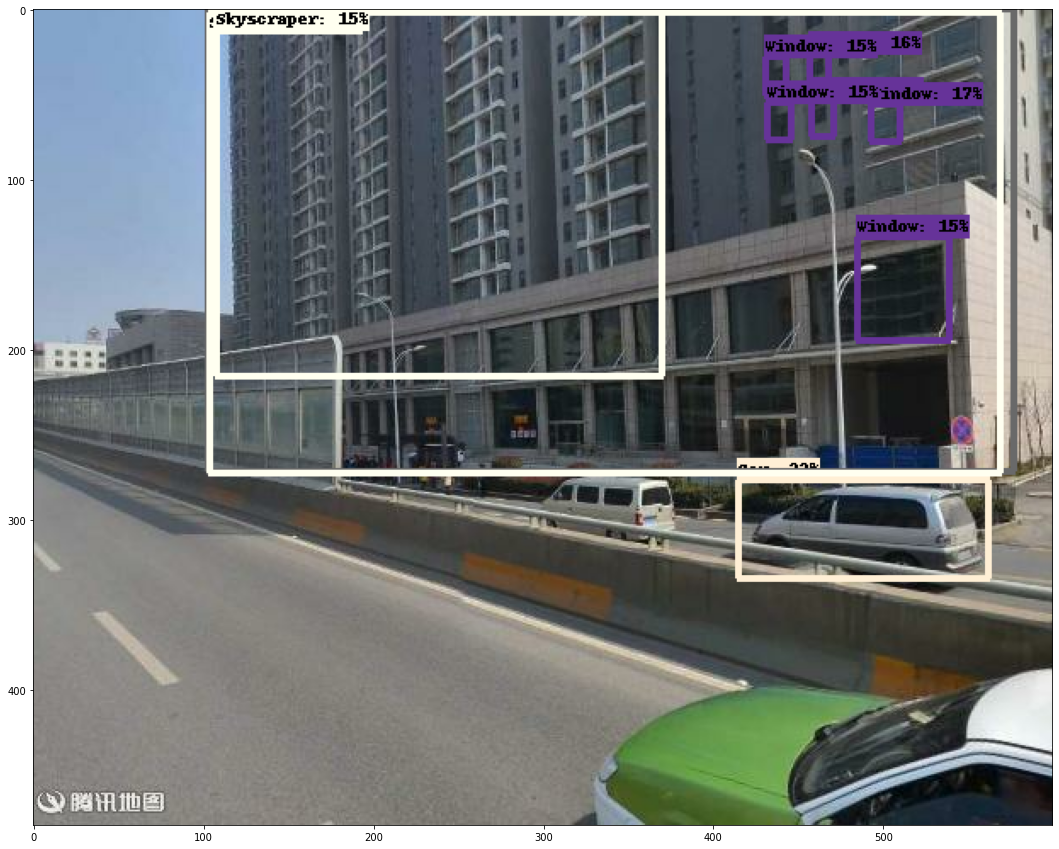

In [15]:
run_detector(detector, '10141003150307135448000_back_115.jpg')

In [ ]:
run_detector(detector, '10141003150307135448000_front_295.jpg')

In [ ]:
run_detector(detector, '10141003150307135448000_left_205.jpg')

In [ ]:
run_detector(detector, '10141003150307135448000_right_25.jpg')

In [ ]:
# run_detector(detector, 'select.jpg')

In [ ]:
run_detector(detector, os.path.join(dirs,filelist[0])).tolist()[0:10]

Found 100 objects.
Inference time:  0.11530256271362305
Font not found, using default font.


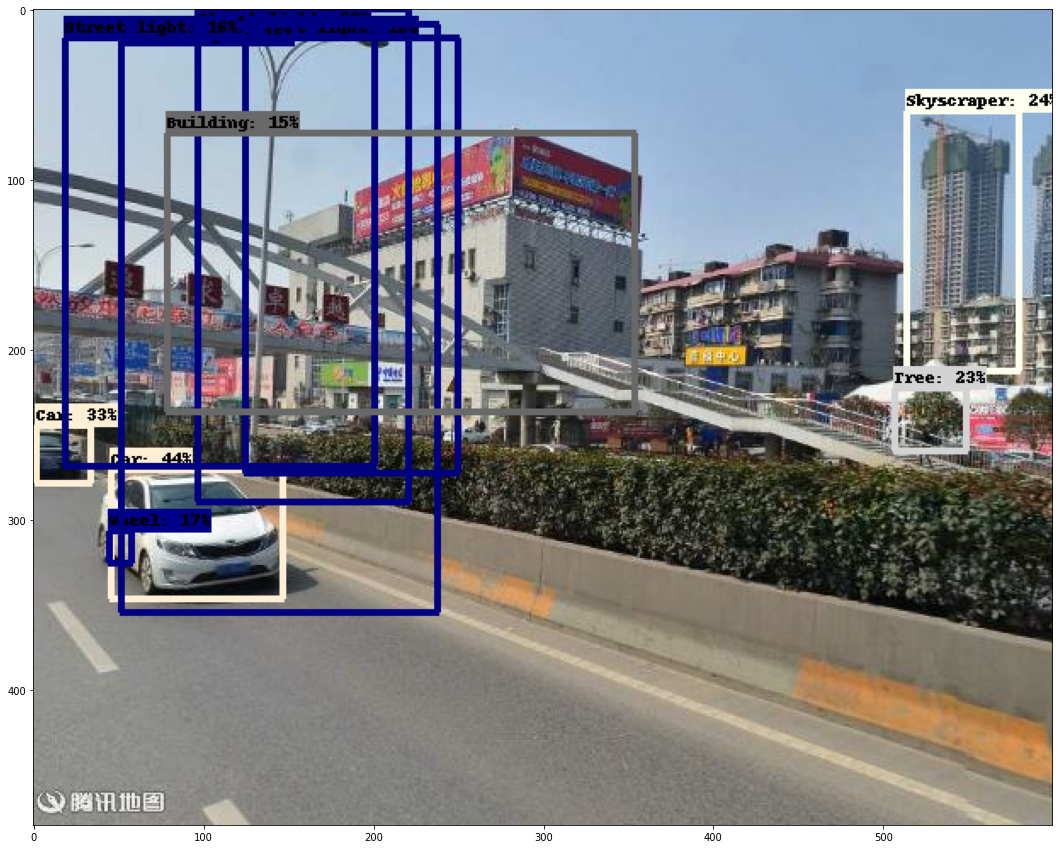

In [18]:
dirs=r'D:\BaiduNetdiskDownload\wuhan\wuhan\wuhan3ring_50'

Found 100 objects.
Inference time:  0.11334848403930664
Font not found, using default font.


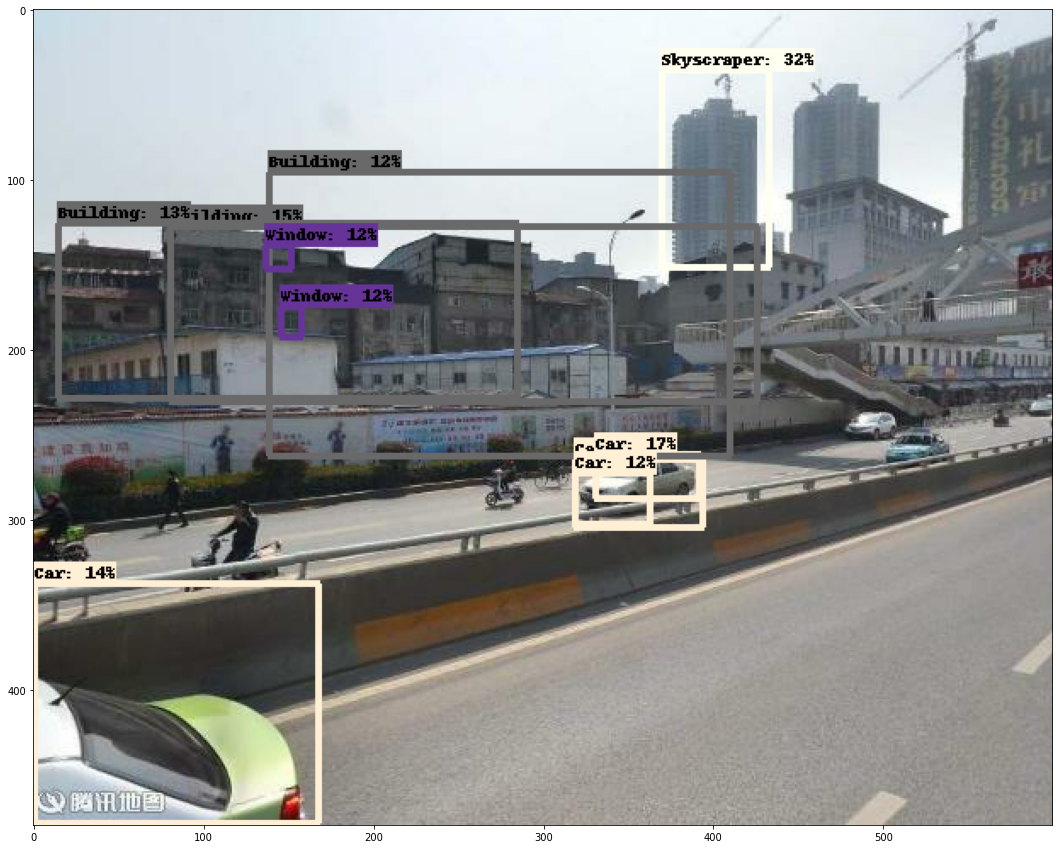

In [19]:
run_detector(detector, '10141003150307135448000_left_205.jpg')

Found 100 objects.
Inference time:  0.12116575241088867
Font not found, using default font.


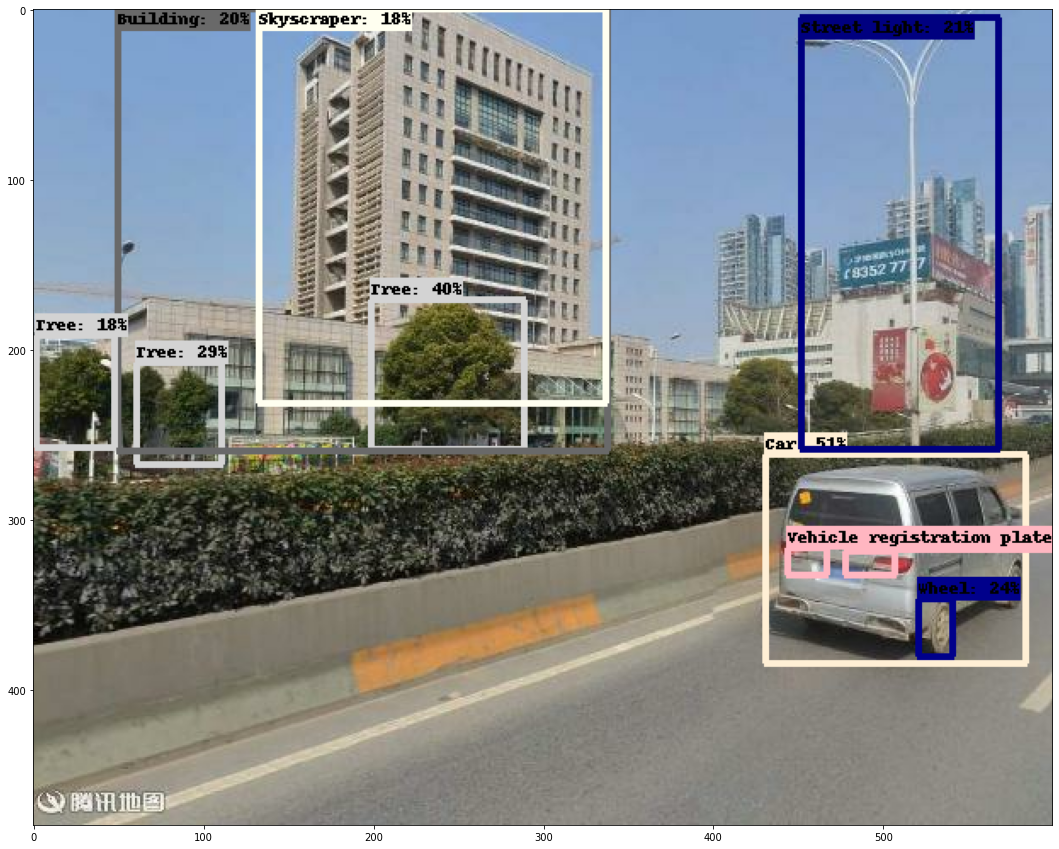

In [20]:
run_detector(detector, '10141003150307135448000_right_25.jpg')

In [5]:
# run_detector(detector, 'select.jpg')

In [ ]:
run_detector(detector, os.path.join(dirs,filelist[0])).tolist()[0:10]

In [20]:
dirs=r'D:\BaiduNetdiskDownload\wuhan\wuhan\wuhan3ring_50'

In [56]:
filenames=os.listdir(dirs)
len(filenames)

333880

In [78]:
filenames[0:3]

['10141003150306134357300_back_349.jpg',
 '10141003150306134357300_front_169.jpg',
 '10141003150306134357300_left_79.jpg']

In [79]:
filenames[0:1][0][0:23]

'10141003150306134357300'

In [74]:
len('10141003150306134357300')

23

In [59]:
os.path.join(dirs,filenames[0])

'D:\\BaiduNetdiskDownload\\wuhan\\wuhan\\wuhan3ring_50\\10141003150306134357300_back_349.jpg'

In [30]:
filenames[0]

'10141003150306134357300_back_349.jpg'

In [63]:
# import MySQLdb

# # open database connect
# db = MySQLdb.connect("localhost", "root", "mysql", "seq2seq", charset='utf8' )
# # using cursor()
# cursor = db.cursor()

# # if  Exist execute() delete table
# cursor.execute("DROP TABLE IF EXISTS StreetView")

# #create table
# sql = """CREATE TABLE StreetView (
#          PhotoName  CHAR(50) NOT NULL,
#          OneType  TEXT,
#          TwoType TEXT)"""

# cursor.execute(sql)

0

In [66]:
# for i in filenames:
# #     print(i)
#     result=run_detector(detector, os.path.join(dirs,i)).tolist()
    
#     OneType=b' '.join(result).decode()
#     TwoType=b' '.join(result[0:25]).decode()
    
#     # SQL INSERT
#     sql = "INSERT INTO StreetView(PhotoName, OneType, TwoType) \
#            VALUES (%s, %s, %s)" % \
#            (i,OneType,TwoType)
    
#     # sql
#     cursor.execute(sql)
#     # commit database
#     db.commit()

In [86]:
# run_detector(detector, os.path.join(dirs,filenames[0]))[0]

b'House'

In [87]:
import pandas as pd
import random
pf = pd.DataFrame(columns=('PhotoName', 'PhotoID','OneType', 'TwoType'))
# for i in range(5):
#     pf.loc[i] = []
#     # loc can assign values to indexes that do not exist, whereas iloc does not, and iloc can only operate on positions that already exist.
for i in range(len(filenames)):
    
#     print(i)
    result=run_detector(detector, os.path.join(dirs,filenames[i])).tolist()

    OneType=b' '.join(result).decode()
    TwoType=b' '.join(result[0:25]).decode()
    pf.loc[i] = [filenames[i],filenames[0:1][0][0:23],OneType,TwoType]

In [92]:
pf.to_csv(r'D:\BaiduNetdiskDownload\wuhan\streetview.csv',encoding='utf_8_sig',index=None)

In [89]:
print('Done')

Done


In [90]:
pf.shape

(333880, 4)

In [ ]:

for i in filenames:
#     print(i)
    result=run_detector(detector, os.path.join(dirs,i)).tolist()
    
    OneType=b' '.join(result).decode()
    TwoType=b' '.join(result[0:25]).decode()
    

In [ ]:
line = b" ".join(line.split())

In [43]:
# run_detector(detector, os.path.join(dirs,filelist[0])).tolist()[0:10]

In [33]:
b' '.join(run_detector(detector, os.path.join(dirs,filelist[0])).tolist())

b'House Car Tree Tree Land vehicle Car Tree Tree House House Car Tree Tree House Tree Car Tree Tree Tree House Tree Tree Tree Tree Tree Tree House Tree Tree Tree Tree House Tree Tree Tree Tree Tree House Window Tree House Tree Window Tree House House Window Tree Tree Tree Tree Tree Tree Tree Window Tree House Tree Tree Land vehicle House House Land vehicle Tree Car Tree House Tree Car House Tree Tree Tree House Window House Tree House House Tree Window Tree Tree Window Tree Tree House Wheel Window House House Tree Tree Tree Tree House Tree Tree Vehicle House'

In [40]:
b' '.join(run_detector(detector, os.path.join(dirs,filelist[0])).tolist()).decode()

'House Car Tree Tree Land vehicle Car Tree Tree House House Car Tree Tree House Tree Car Tree Tree Tree House Tree Tree Tree Tree Tree Tree House Tree Tree Tree Tree House Tree Tree Tree Tree Tree House Window Tree House Tree Window Tree House House Window Tree Tree Tree Tree Tree Tree Tree Window Tree House Tree Tree Land vehicle House House Land vehicle Tree Car Tree House Tree Car House Tree Tree Tree House Window House Tree House House Tree Window Tree Tree Window Tree Tree House Wheel Window House House Tree Tree Tree Tree House Tree Tree Vehicle House'